**Scatter plot**

In [21]:
import pandas as pd
import numpy as np

In [22]:
from google.colab import drive
drive.mount('/content/drive') #import file from gg drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df = pd.read_csv('/content/fastfood.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [24]:
df.isna().sum() #check missing value

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [25]:
mean_vit_a = round(df['vit_a'].mean(), 1)
mean_vit_c = round(df['vit_c'].mean(), 1)
mean_calcium = round(df['calcium'].mean(), 1)
mean_vit_a, mean_vit_c, mean_calcium #find mean

(18.9, 20.2, 24.9)

In [26]:
df['vit_a'].fillna(mean_vit_a, inplace=True)
df['vit_c'].fillna(mean_vit_c, inplace=True)
df['calcium'].fillna(mean_vit_a, inplace=True) #add mean in attribute is not found
df_cleaned = df.dropna(subset=['fiber', 'protein']) #delete missing value ex.null
df_cleaned

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,18.9,20.2,18.9,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,18.9,20.2,18.9,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,18.9,20.2,18.9,Other


In [27]:
df_cleaned.isna().sum() #check null again

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

In [28]:
from sklearn.cluster import AgglomerativeClustering

# Select the features
X = df_cleaned[['sat_fat', 'cholesterol']]

# Define the Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the model
cluster_labels = agg_clustering.fit_predict(X)

# Add the cluster labels to the original dataframe
df_cleaned['Cluster'] = cluster_labels
df_cleaned['Heart_disease'] = df_cleaned['Cluster'].map({ 0 : 'Normal', 4 : 'Risky', 1 : 'Risky', 2 : 'Risky', 3 : 'Risky'})

# Print the resulting dataframe
print(df_cleaned[['sat_fat', 'cholesterol', 'Cluster', 'Heart_disease']])

     sat_fat  cholesterol  Cluster Heart_disease
0        2.0           95        4         Risky
1       17.0          130        2         Risky
2       27.0          220        1         Risky
3       10.0          155        2         Risky
4       12.0          120        2         Risky
..       ...          ...      ...           ...
510     10.0           50        0        Normal
511      9.0           60        0        Normal
512     10.0           60        0        Normal
513      7.0           70        4         Risky
514      8.0           55        0        Normal

[503 rows x 4 columns]


<ipython-input-28-2c194ff9d630>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels
<ipython-input-28-2c194ff9d630>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Heart_disease'] = df_cleaned['Cluster'].map({ 0 : 'Normal', 4 : 'Risky', 1 : 'Risky', 2 : 'Risky', 3 : 'Risky'})


In [29]:
#show result of each cluster
label_0 = df_cleaned[df_cleaned['Cluster']==0]
label_1 = df_cleaned[df_cleaned['Cluster']==1]
label_2 = df_cleaned[df_cleaned['Cluster']==2]
label_3 = df_cleaned[df_cleaned['Cluster']==3]
label_4 = df_cleaned[df_cleaned['Cluster']==4]

print("Cluster 0",len(label_0))
print("Cluster 1",len(label_1))
print("Cluster 2",len(label_2))
print("Cluster 3",len(label_3))
print("Cluster 4",len(label_4))

Cluster 0 302
Cluster 1 18
Cluster 2 62
Cluster 3 1
Cluster 4 120


<Axes: >

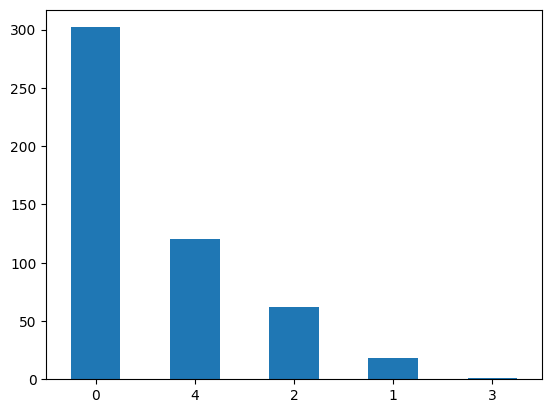

In [30]:
#bar plot each cluster count
df_cleaned['Cluster'].value_counts().plot(kind='bar', rot=0)

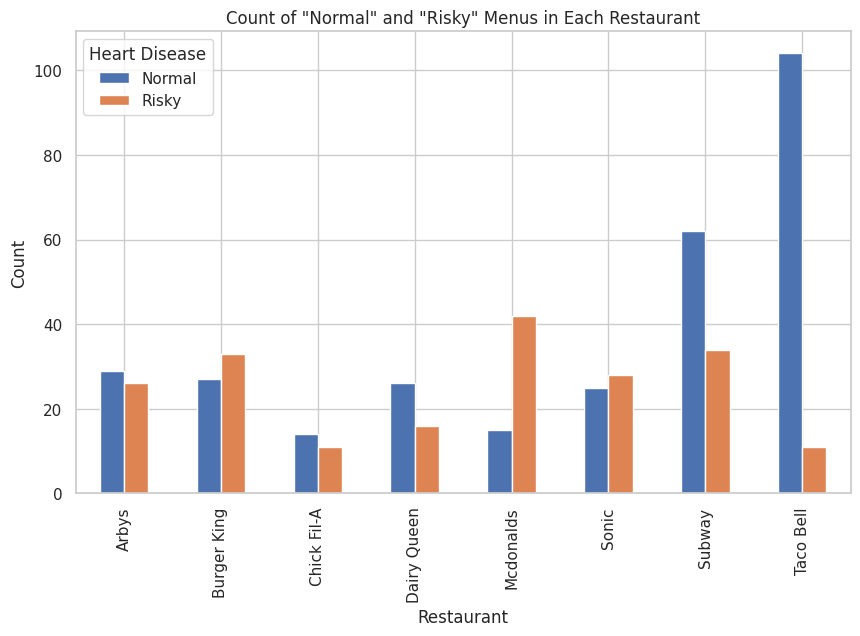

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'restaurant' and 'Heart_disease' and count the occurrences
grouped_data = df_cleaned.groupby(['restaurant', 'Heart_disease']).size().reset_index(name='count')

# Pivot the data to have 'restaurant' as rows and 'Heart_disease' as columns
pivot_data = grouped_data.pivot(index='restaurant', columns='Heart_disease', values='count')

# Plot the count of 'Normal' and 'Risky' menus in each restaurant with separate bars
sns.set(style='whitegrid')
pivot_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Count of "Normal" and "Risky" Menus in Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()

In [32]:
# Print and save the result
df_cleaned.to_csv('fastfood_output.csv')
df_cleaned.sample(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad,Cluster,Heart_disease
23,Mcdonalds,Grilled Pico Guacamole Chicken Sandwich,520,160,18,6.0,0.0,115,1540,50,4.0,12,40.0,8.0,25.0,30.0,Other,2,Risky
145,Arbys,Buttermilk Chicken Bacon & Swiss,650,280,31,9.0,0.0,90,1750,56,2.0,9,39.0,18.9,20.2,18.9,Other,4,Risky
100,Sonic,Super Sonic Double Cheeseburger W/ Ketchup,1130,680,76,32.0,4.0,235,1620,47,2.0,11,63.0,20.0,10.0,40.0,Other,1,Risky
464,Taco Bell,Fresco Chicken Soft Taco,150,35,4,1.0,0.0,25,460,18,2.0,2,11.0,18.9,20.2,18.9,Other,0,Normal
68,Chick Fil-A,12 piece Chicken Nuggets,390,162,18,1.5,0.0,115,1460,14,2.0,1,41.0,0.0,8.0,4.0,Other,2,Risky
342,Subway,"6"" Steak and Cheese",380,90,10,5.0,0.0,50,1060,48,5.0,8,26.0,10.0,20.0,40.0,Other,0,Normal
437,Taco Bell,Crunchy Taco,170,90,10,4.0,0.0,25,290,12,3.0,1,8.0,18.9,20.2,18.9,Other,0,Normal
466,Taco Bell,Fresco Grilled Steak Soft Taco,150,35,4,2.0,0.0,15,500,19,2.0,2,9.0,18.9,20.2,18.9,Other,0,Normal
263,Dairy Queen,1/2 lb. GrillBurger with Cheese,800,460,51,20.0,2.0,135,1280,44,3.0,13,40.0,25.0,6.0,35.0,Other,2,Risky
129,Sonic,"All Beef Chicago Dog – 6""",430,180,20,7.0,0.0,40,2310,49,1.0,17,14.0,4.0,6.0,10.0,Other,0,Normal


In [43]:
# Filter the data for items in cluster 0
cluster_0_data = df_cleaned[df_cleaned['Cluster'] == 0]

# Get the minimum and maximum values of cholesterol in cluster 0
min_cholesterol = cluster_0_data['cholesterol'].min()
max_cholesterol = cluster_0_data['cholesterol'].max()
min_satfat= cluster_0_data['sat_fat'].min()
max_satfat = cluster_0_data['sat_fat'].max()
mean_cholesterol = cluster_0_data['cholesterol'].mean()
mean_satfat = cluster_0_data['sat_fat'].mean()

# Print the minimum and maximum values of cholesterol in cluster 0
print("Minimum Cholesterol in Cluster 0:", min_cholesterol)
print("Maximum Cholesterol in Cluster 0:", max_cholesterol)

print("Minimum  Sat_fat in Cluster 0:", min_satfat)
print("Maximum Sat_fat in Cluster 0:", max_satfat)

print("Mean Cholesterol in Cluster 0:", mean_cholesterol)
print("Mean Sat_fat in Cluster 0:", mean_satfat)

Minimum Cholesterol in Cluster 0: 0
Maximum Cholesterol in Cluster 0: 70
Minimum  Sat_fat in Cluster 0: 0.0
Maximum Sat_fat in Cluster 0: 14.0
Mean Cholesterol in Cluster 0: 38.69205298013245
Mean Sat_fat in Cluster 0: 5.0927152317880795


In [44]:
# Filter the data for items in cluster 1
cluster_0_data = df_cleaned[df_cleaned['Cluster'] == 1]

# Get the minimum and maximum values of cholesterol in cluster 1
min_cholesterol = cluster_0_data['cholesterol'].min()
max_cholesterol = cluster_0_data['cholesterol'].max()
min_satfat= cluster_0_data['sat_fat'].min()
max_satfat = cluster_0_data['sat_fat'].max()
mean_cholesterol = cluster_0_data['cholesterol'].mean()
mean_satfat = cluster_0_data['sat_fat'].mean()

# Print the minimum and maximum values of cholesterol in cluster 1
print("Minimum Cholesterol in Cluster 1:", min_cholesterol)
print("Maximum Cholesterol in Cluster 1:", max_cholesterol)

print("Minimum  Sat_fat in Cluster 1:", min_satfat)
print("Maximum Sat_fat in Cluster 1:", max_satfat)

print("Mean Cholesterol in Cluster 1:", mean_cholesterol)
print("Mean Sat_fat in Cluster 1:", mean_satfat)

Minimum Cholesterol in Cluster 1: 200
Maximum Cholesterol in Cluster 1: 475
Minimum  Sat_fat in Cluster 1: 2.5
Maximum Sat_fat in Cluster 1: 36.0
Mean Cholesterol in Cluster 1: 253.05555555555554
Mean Sat_fat in Cluster 1: 23.916666666666668


In [45]:
# Filter the data for items in cluster 2
cluster_0_data = df_cleaned[df_cleaned['Cluster'] == 2]

# Get the minimum and maximum values of cholesterol in cluster 2
min_cholesterol = cluster_0_data['cholesterol'].min()
max_cholesterol = cluster_0_data['cholesterol'].max()
min_satfat= cluster_0_data['sat_fat'].min()
max_satfat = cluster_0_data['sat_fat'].max()
mean_cholesterol = cluster_0_data['cholesterol'].mean()
mean_satfat = cluster_0_data['sat_fat'].mean()

# Print the minimum and maximum values of cholesterol in cluster 2
print("Minimum Cholesterol in Cluster 2:", min_cholesterol)
print("Maximum Cholesterol in Cluster 2:", max_cholesterol)

print("Minimum Sat_fat in Cluster 2:", min_satfat)
print("Maximum Sat_fat in Cluster 2:", max_satfat)

print("Mean Cholesterol in Cluster 2:", mean_cholesterol)
print("Mean Sat_fat in Cluster 2:", mean_satfat)

Minimum Cholesterol in Cluster 2: 105
Maximum Cholesterol in Cluster 2: 190
Minimum Sat_fat in Cluster 2: 1.5
Maximum Sat_fat in Cluster 2: 43.0
Mean Cholesterol in Cluster 2: 134.11290322580646
Mean Sat_fat in Cluster 2: 14.129032258064516


In [48]:
# Filter the data for items in cluster 3
cluster_0_data = df_cleaned[df_cleaned['Cluster'] == 3]

# Get the minimum and maximum values of cholesterol in cluster 3
min_cholesterol = cluster_0_data['cholesterol'].min()
max_cholesterol = cluster_0_data['cholesterol'].max()
min_satfat= cluster_0_data['sat_fat'].min()
max_satfat = cluster_0_data['sat_fat'].max()
mean_cholesterol = cluster_0_data['cholesterol'].mean()
mean_satfat = cluster_0_data['sat_fat'].mean()

# Print the minimum and maximum values of cholesterol in cluster 3
print("Minimum Cholesterol in Cluster 3:", min_cholesterol)
print("Maximum Cholesterol in Cluster 3:", max_cholesterol)

print("Minimum  Sat_fat in Cluster 3:", min_satfat)
print("Maximum Sat_fat in Cluster 3:", max_satfat)

print("Mean Cholesterol in Cluster 3:", mean_cholesterol)
print("Mean Sat_fat in Cluster 3:", mean_satfat)

Minimum Cholesterol in Cluster 3: 805
Maximum Cholesterol in Cluster 3: 805
Minimum  Sat_fat in Cluster 3: 47.0
Maximum Sat_fat in Cluster 3: 47.0
Mean Cholesterol in Cluster 3: 805.0
Mean Sat_fat in Cluster 3: 47.0


In [47]:
# Filter the data for items in cluster 4
cluster_0_data = df_cleaned[df_cleaned['Cluster'] == 4]

# Get the minimum and maximum values of cholesterol in cluster 4
min_cholesterol = cluster_0_data['cholesterol'].min()
max_cholesterol = cluster_0_data['cholesterol'].max()
min_satfat= cluster_0_data['sat_fat'].min()
max_satfat = cluster_0_data['sat_fat'].max()
mean_cholesterol = cluster_0_data['cholesterol'].mean()
mean_satfat = cluster_0_data['sat_fat'].mean()

# Print the minimum and maximum values of cholesterol in cluster 4
print("Minimum Cholesterol in Cluster 4:", min_cholesterol)
print("Maximum Cholesterol in Cluster 4:", max_cholesterol)

print("Minimum Sat_fat in Cluster 4:", min_satfat)
print("Maximum Sat_fat in Cluster 4:", max_satfat)

print("Mean Cholesterol in Cluster 4:", mean_cholesterol)
print("Mean Sat_fat in Cluster 4:", mean_satfat)

Minimum Cholesterol in Cluster 4: 70
Maximum Cholesterol in Cluster 4: 100
Minimum Sat_fat in Cluster 4: 0.0
Maximum Sat_fat in Cluster 4: 22.0
Mean Cholesterol in Cluster 4: 86.79166666666667
Mean Sat_fat in Cluster 4: 9.366666666666667
